In [68]:
# Import the necessary libraries or install them if they are not installed related to training the model.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [69]:
# Read the data from the csv file
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.read_csv("bank.csv", header=None, names=col_names, skiprows=[0])

In [70]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [71]:
# Convert the categorical data into numerical data
catergorical_columns = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.get_dummies(bank, columns=catergorical_columns, drop_first=True, prefix=None)
# Convert the non-binary categorical data into numerical data
label_encoder = LabelEncoder()
bank["region"] = label_encoder.fit_transform(bank["region"])

In [72]:
bank.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,False,False,False,False,False,False,True
1,ID12102,40,3,30085.1,3,True,True,True,False,True,True,False
2,ID12103,51,0,16575.4,0,False,True,True,True,True,False,False
3,ID12104,23,3,20375.4,3,False,True,False,False,True,False,False
4,ID12105,57,1,50576.3,0,False,True,False,True,False,False,False


In [73]:
# Spilitting the data, the features columns refers to the independent variables and the label column refers to the dependent variable
# The label column is the column that we are trying to predict
feature_cols = ["age", "sex_MALE", "income", "married_YES", "children", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = bank[feature_cols] # Features
y = bank.pep_YES # Target variable

In [74]:
# Splitting the data into training and testing sets
# 70% training and 30% testing are the common ratios (80/20 is also common)
# The random_state is used to ensure that the data is split in the same way every time the code is run

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [75]:
# Normalize the data to make the model more accurate as this is a KNN model.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Create Logistic Regression classifer object
logreg = LogisticRegression()

# Fit the data into the model
logreg = logreg.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = logreg.predict(X_test)

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.5722222222222222
Precision: 0.5217391304347826


In [78]:
# The model accuracy was pretty low, so we will try to improve the model by using hyperparameter tuning
# Create regularization penalty space, regularization parameter space and optimization algorithm space
# The "C" values are the inverse of the regularization strength. Smaller values specify stronger regularization.
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Create a logistic regression model
logreg = LogisticRegression()

# Create grid search object (You could also use RandomizedSearchCV)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score found:  0.62


C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Firesoft\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [79]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, predictions))

Accuracy: 0.5666666666666667
Precision: 0.5131578947368421


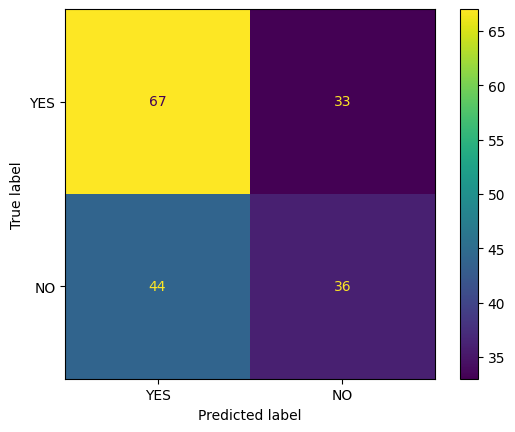

In [80]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

# Notes
### Logistic Regression Pros
- Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.
- Uses the standardized Sigmoid Function which separates the areas by using the curve to predict the binary target variables.
- Similar to decision trees, it does contain any assumptions as it is non parametric.
- Has many hyperparameter tuning which was great for model optimization.:
    - Regularization Parameter (C): Tuning the regularization parameter can often lead to significant improvements in performance, especially when dealing with overfitting. If your model is overfitting the training data, try decreasing 'C' to increase regularization strength. Conversely, if your model is underfitting, increasing 'C' may help improve performance.

    - Solver: The choice of solver can impact both training time and performance. For smaller datasets, 'liblinear' is often a good choice, while for larger datasets, 'sag' or 'saga' may be more efficient. It's a good idea to try multiple solvers and see which one performs best for your specific dataset.

    - Penalty (L1 vs. L2): If you suspect that some features are irrelevant or redundant, using L1 regularization (Lasso) may help by encouraging sparsity in the model. However, if you have a large number of features, L2 regularization (Ridge) may be more appropriate. You can experiment with both penalties and see which one yields better results.
### Logistic Cons
- Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.
- The hyper parameter tuning process was more complex than other algorithms.

Source: chatGPT and datacamp.com with some modifications

### What I have learned
- This model performed the worse compared to other models. This was even with some hyper parameter tuning.
- It was expected for this model to performed poorly since the dataset was not linearly related and was building on assumptions.
- Although it's performance was not too bad compared to Naive Bayes